# 📝 Exercise M5.02

The aim of this exercise is to find out whether a decision tree
model is able to extrapolate.

By extrapolation, we refer to values predicted by a model outside of the
range of feature values seen during the training.

We will first load the regression data.

In [1]:
import pandas as pd

penguins = pd.read_csv("../datasets/penguins_regression.csv")

data_columns = ["Flipper Length (mm)"]
target_column = "Body Mass (g)"

data_train, target_train = penguins[data_columns], penguins[target_column]

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">If you want a deeper overview regarding this dataset, you can refer to the
Appendix - Datasets description section at the end of this MOOC.</p>
</div>

First, create two models, a linear regression model and a decision tree
regression model, and fit them on the training data. Limit the depth at
3 levels for the decision tree.

In [3]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(data_train, target_train)

LinearRegression()

In [4]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=3)
tree.fit(data_train, target_train)

DecisionTreeRegressor(max_depth=3)

Create a testing dataset, ranging from the minimum to the maximum of the
flipper length of the training dataset. Get the predictions of each model
using this test dataset.

In [6]:
import numpy as np

data_test = pd.DataFrame(np.arange(data_train[data_columns[0]].min(),
                                   data_train[data_columns[0]].max()),
                         columns=data_columns)
linear_predicted = linear_model.predict(data_test)
tree_predicted = tree.predict(data_test)

Create a scatter plot containing the training samples and superimpose the
predictions of both model on the top.

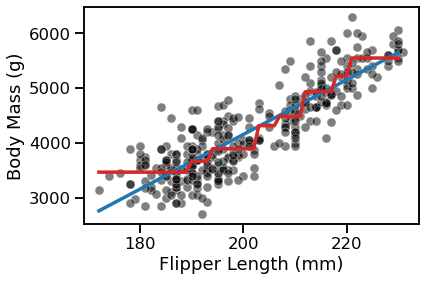

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=penguins, x="Flipper Length (mm)", y="Body Mass (g)",
                color="black", alpha=0.5)
plt.plot(data_test, linear_predicted, color='tab:blue', label="Linear regression")
plt.plot(data_test, tree_predicted, color='tab:red', label="Decision tree")

Now, we will check the extrapolation capabilities of each model. Create a
dataset containing the value of your previous dataset. Besides, add values
below and above the minimum and the maximum of the flipper length seen
during training.

In [9]:
data_test = pd.DataFrame(np.arange(0.7 * data_train[data_columns[0]].min(),
                                   1.3 * data_train[data_columns[0]].max()),
                         columns=data_columns)
linear_predicted = linear_model.predict(data_test)
tree_predicted = tree.predict(data_test)

Finally, make predictions with both model on this new testing set. Repeat
the plotting of the previous exercise.

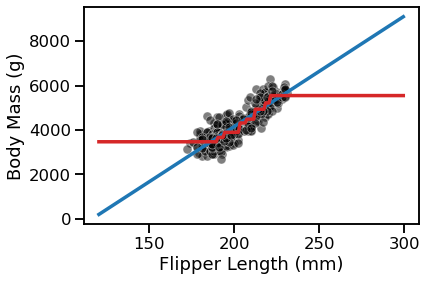

In [10]:
sns.scatterplot(data=penguins, x="Flipper Length (mm)", y="Body Mass (g)",
                color="black", alpha=0.5)
plt.plot(data_test, linear_predicted, color='tab:blue', label="Linear regression")
plt.plot(data_test, tree_predicted, color='tab:red', label="Decision tree")